<h2> Importing required packages </h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib 
from matplotlib import pyplot as plt

<h2> Loading the data </h2>

In [2]:
dfBHD1 = pd.read_csv("Bengaluru_House_Data.csv")
dfBHD1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<h2> Analyzing and cleaning the data </h2>

In [3]:
dfBHD1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Data cleaning

In [4]:
dfBHD2 = dfBHD1.drop(['area_type','society','balcony','availability'],axis='columns')
dfBHD1.shape

(13320, 9)

In [5]:
dfBHD3 = dfBHD2.dropna()

<h4> Creating a new column 'BHK' </h4>

In [6]:
dfBHD3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [7]:
dfBHD3['BHK']=dfBHD3['size'].str.split(' ').str[0]
dfBHD3['BHK']=pd.to_numeric(dfBHD3['BHK'],errors='coerce')

C:\Users\adars\AppData\Local\Temp\ipykernel_10060\777453808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBHD3['BHK']=dfBHD3['size'].str.split(' ').str[0]
C:\Users\adars\AppData\Local\Temp\ipykernel_10060\777453808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBHD3['BHK']=pd.to_numeric(dfBHD3['BHK'],errors='coerce')


In [8]:
dfBHD3.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

<h4> Removing the rows with 'BHK>12' </h4>

In [9]:
dfBHD3=dfBHD3[dfBHD3['BHK']<=12]

<h4> Function to clean the data in 'total_sqft' </h4>

In [10]:
dfBHD3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
def ConvertSftToInt(x):
    arr = x.split('-')
    if len(arr) == 2:
        return (float(arr[0])+float(arr[1]))/2
    try:
        return float(x)
    except:
        return None   

In [12]:
dfBHD4 = dfBHD3.copy()
dfBHD4['total_sqft']= dfBHD4['total_sqft'].apply(ConvertSftToInt)
dfBHD4 = dfBHD4[dfBHD4['total_sqft'].notnull()]

<h4> Creating a new column 'PricePerSqft' </h4>

In [13]:
dfBHD5 = dfBHD4.copy()
dfBHD5['PricePerSqft'] = dfBHD5['price']*100000/dfBHD5['total_sqft']
dfBHD5.head()

,location,size,total_sqft,bath,price,BHK,PricePerSqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


<h4> Dimensionality reduction </h4>

In [14]:
dfBHD5['location'] = dfBHD5['location'].apply(lambda x: x.strip())
groupingLocations = dfBHD5['location'].value_counts(ascending=False)
groupingLocations

Whitefield                            533
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        264
Thanisandra                           235
                                     ... 
Papareddipalya                          1
K R C kothanur                          1
Hosahalli                               1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1282, dtype: int64

In [15]:
groupingLocations2 = groupingLocations[groupingLocations<=10]
groupingLocations2

Dairy Circle                          10
Nagappa Reddy Layout                  10
BTM 1st Stage                         10
Thyagaraja Nagar                      10
Naganathapura                         10
                                      ..
Papareddipalya                         1
K R C kothanur                         1
Hosahalli                              1
near Ramanashree California resort     1
Abshot Layout                          1
Name: location, Length: 1042, dtype: int64

In [16]:
dfBHD5['location'] = dfBHD5['location'].apply(lambda x: 'other' if x in groupingLocations2 else x)
len(dfBHD5.location.unique())

241

<h4> Removing outliers </h4>

In [17]:
dfBHD5[dfBHD5['total_sqft']/dfBHD5['BHK']<300].head()

,location,size,total_sqft,bath,price,BHK,PricePerSqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [18]:
dfBHD6 = dfBHD5[~(dfBHD5['total_sqft']/dfBHD5['BHK']<300)]
dfBHD6.shape

(12454, 7)

<h4> Function to remove outliers in 'PricePerSqft' </h4>

In [19]:
dfBHD6['PricePerSqft'].describe()

count     12454.000000
mean       6308.667262
std        4168.440939
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: PricePerSqft, dtype: float64

In [20]:
def removePPSOutliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.PricePerSqft)
        st = np.std(subdf.PricePerSqft)
        reduced_df = subdf[(subdf.PricePerSqft>(m-st)) & (subdf.PricePerSqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
dfBHD7 = removePPSOutliers(dfBHD6)
dfBHD7.shape

(10241, 7)

<h4> Scatter plot between price and a particular category </h4>

In [21]:
def plotScatterChart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*', color='orange',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (in rupees)")
    plt.title(location)
    plt.legend()

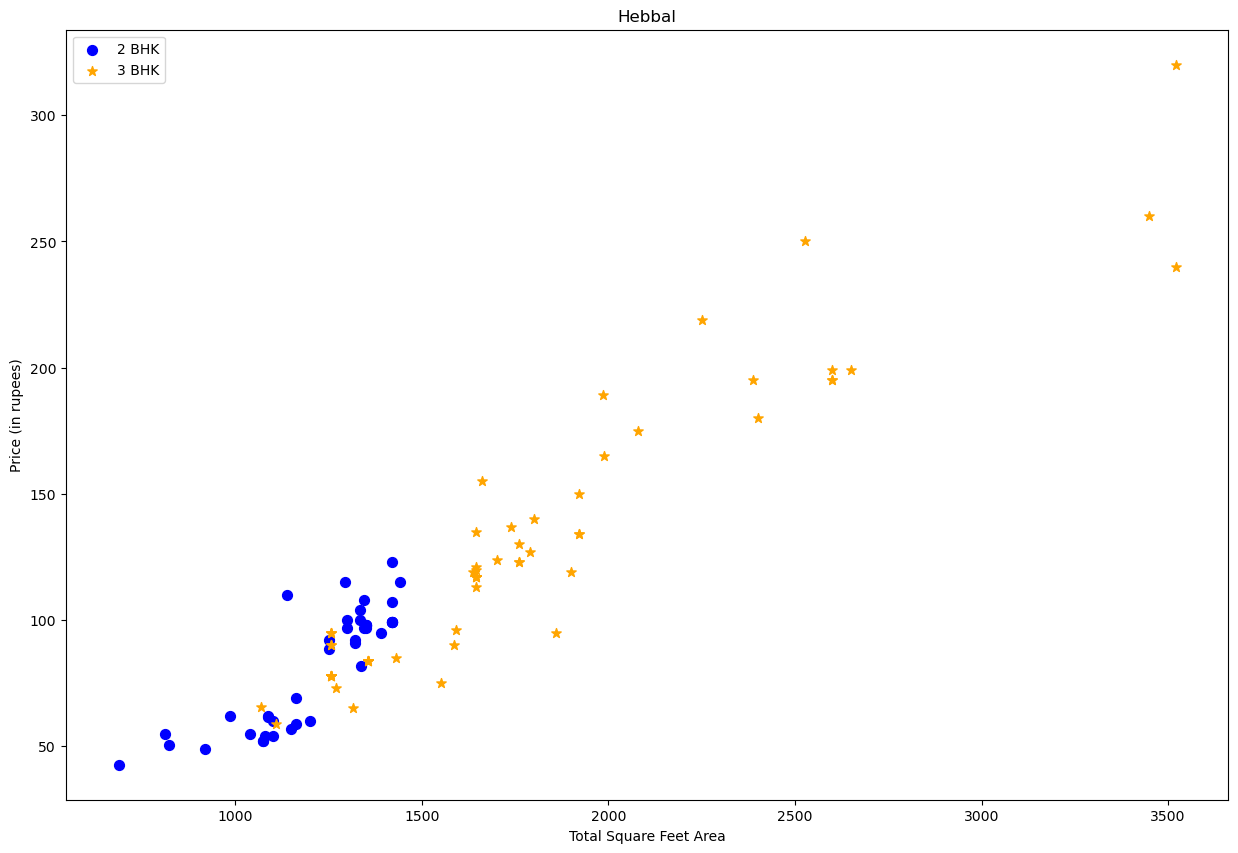

In [22]:
    
plotScatterChart(dfBHD7,"Hebbal")

<h4> Removing outliers with respect to 'price' and 'BHK' </h4>

In [23]:
def removeBHKOutliers(df):
    excludeIndices = np.array([])
    for location, location_df in df.groupby('location'):
        bhkStats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhkStats[bhk] = {
                'mean': np.mean(bhk_df.PricePerSqft),
                'std': np.std(bhk_df.PricePerSqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhkStats.get(bhk-1)
            if stats and stats['count']>5:
                excludeIndices = np.append(excludeIndices, bhk_df[bhk_df.PricePerSqft<(stats['mean'])].index.values)
    return df.drop(excludeIndices,axis='index')
dfBHD8 = removeBHKOutliers(dfBHD7)
dfBHD8.shape

(7316, 7)

<h4> Removing outliers in 'bath' </h4>

In [24]:
dfBHD8[dfBHD8.bath>dfBHD8.BHK+1]

,location,size,total_sqft,bath,price,BHK,PricePerSqft
36,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,15033.333333
37,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,450.0,6,18750.000000
530,Arekere,4 BHK,2710.0,6.0,142.0,4,5239.852399
580,BTM 2nd Stage,3 Bedroom,1260.0,5.0,185.0,3,14682.539683
813,Bannerghatta,4 BHK,3012.0,6.0,250.0,4,8300.132802
...,...,...,...,...,...,...,...
9913,other,4 BHK,6652.0,6.0,510.0,4,7666.867108
10034,other,2 BHK,600.0,4.0,70.0,2,11666.666667
10089,other,3 Bedroom,5656.0,5.0,499.0,3,8822.489392
10202,other,4 BHK,6652.0,6.0,660.0,4,9921.828022


In [25]:
dfBHD9 = dfBHD8[dfBHD8.bath<dfBHD8.BHK+1]
dfBHD9.shape

(6857, 7)

In [26]:
mean = dfBHD9['PricePerSqft'].mean()
std_dev = dfBHD9['PricePerSqft'].std()
z_scores = np.abs((dfBHD9['PricePerSqft'] - mean) / std_dev)
dfBHD9 = dfBHD9[z_scores < 3]

<h4> Removing unnecessary columns </h4>

In [27]:
dfBHD10 = dfBHD9.drop(['size','PricePerSqft'],axis='columns')
dfBHD10.head(3)

,location,total_sqft,bath,price,BHK
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3


<h4> Performing one hot encoding </h4>

In [28]:
dummies = pd.get_dummies(dfBHD10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
dfBHD11 = pd.concat([dfBHD10,dummies.drop('other',axis='columns')],axis='columns')
dfBHD11.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
dfBHD12 = dfBHD11.drop('location',axis='columns')
dfBHD12.head(2)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
dfBHD13=dfBHD12.drop(['price'],axis='columns')

<h4> Normalizing the features </h4>

In [32]:
scaler = StandardScaler()
scaler.fit(dfBHD13)
dfBHD14 = scaler.transform(dfBHD13)

In [33]:
dfBHD14.shape

(6711, 240)

<h2>Creating ML models<h2> 

In [34]:
X = dfBHD14

In [35]:
y = dfBHD12.price

In [36]:
# bestAccuracy=0
# bestRandomState=0
# for rs in range(1000):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)
#     model = LinearRegression()
#     model.fit(X_train, y_train)
#     y_test_pred = model.predict(X_test)
#     accuracy = r2_score(y_test, y_test_pred)
#     if accuracy>bestAccuracy:
#         bestAccuracy=accuracy
#         bestRandomState=rs
# print(bestAccuracy)
# print(bestRandomState)

<h4> Linear Regression </h4>

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=808)
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
accuracy = r2_score(y_test, y_test_pred)
print(accuracy)

0.919973159491166


<h4> Decision Tree </h4>

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)
dt_model = DecisionTreeRegressor(random_state=808)
dt_model.fit(X_train, y_train)
y_test_pred_dt = dt_model.predict(X_test)
accuracy_dt = r2_score(y_test, y_test_pred_dt)
print( accuracy_dt)

0.6921209749689118


<h4> Random Forest </h4>

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)
rf_model = RandomForestRegressor(random_state=808)
rf_model.fit(X_train, y_train)
y_test_pred_rf = rf_model.predict(X_test)
accuracy_rf = r2_score(y_test, y_test_pred_rf)
print( accuracy_rf)

0.6810636954744429
